# k近邻算法

* 思想极度简单
* 应用数学知识少
* 效果好
* 可以解释机器学习算法使用过程中的很多细节问题
* 更完整的刻画机器学习应用的流程

## kNN基础

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data_X = [[3.393533211,2.331273381],
             [3.110073483,1.781539638],
             [1.343808831,3.368360954],
             [3.582294042,4.679179110],
             [2.280362439,2.866990263],
             [7.423436942,4.696522875],
             [5.745051997,3.533989803],
             [9.172168622,2.511101045],
             [7.792783481,3.424088941],
             [7.939820817,0.791637231]]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [3]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [4]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [5]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

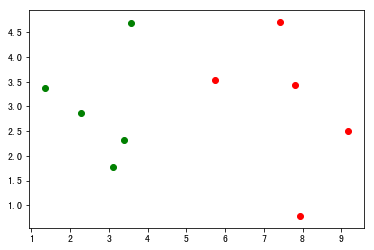

In [6]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='g')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='r')
plt.show()

In [7]:
x = np.array([8.03607318,3.365731514])

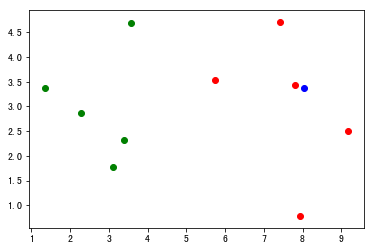

In [8]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='g')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='r')
plt.scatter(x[0], x[1], color='b')
plt.show()

## kNN的过程

In [10]:
from math import sqrt

distances = []
for x_train in X_train:
    d = sqrt(np.sum((x_train  - x)**2))
    distances.append(d)

In [11]:
distances

[4.7563936961412665,
 5.174469723056508,
 6.6922648655631605,
 4.643413959310779,
 5.777278682001746,
 1.4650354284531912,
 2.297191527228831,
 1.421656108866111,
 0.2501908609953036,
 2.5758932227785314]

In [12]:
np.argsort(distances)

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2])

In [13]:
nearest = np.argsort(distances)

In [14]:
k = 6

In [15]:
topK_y = [y_train[i] for i in nearest[:k]]

In [16]:
topK_y

[1, 1, 1, 1, 1, 0]

In [17]:
from collections import Counter
Counter(topK_y)

Counter({1: 5, 0: 1})

In [18]:
votes = Counter(topK_y)

In [19]:
votes

Counter({1: 5, 0: 1})

In [20]:
type(votes)

collections.Counter

In [22]:
votes.most_common(1)

[(1, 5)]

In [24]:
votes.most_common(1)[0][0]

1

In [25]:
predict_y = votes.most_common(1)[0][0]

In [26]:
predict_y

1

## 使用scikit-learn中的kNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [29]:
kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [32]:
kNN_classifier.predict(x.reshape(1,-1))

array([1])

In [33]:
y_predict = kNN_classifier.predict(x.reshape(1,-1))

In [35]:
y_predict[0]

1

## 改写自己的kNN

In [38]:
from math import sqrt
class KNNClassifier:
    
    def __init__(self, k):
        '''初始化kNN分类器'''
        assert k >= 1, 'k must be valid'
        self.k = k
        self._X_train = None
        self._y_train = None
        
    def fit(self, X_train, y_train):
        '''根据训练集X_train和y_train训练kNN分类器'''
        self._X_train = X_train
        self._y_train = y_train
        return self
    
    def predict(self, X_predict):
        y_predict = [self._predict(x) for x in X_predict]
        return y_predict
    
    def _predict(self, x):
        distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in self._X_train]
        nearest = np.argsort(distances)
        topK_y = [self._y_train[i] for i in nearest[:,self.k]]
        wotes=Counter(topK_y)
        return votes.most_common(1)[0][0]